I'm running a Linear Regression in Python on our real estate prices data of the Boston suburbs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

Loading the pre-made data from our csv file.

In [3]:
real_estate_data = pd.read_csv("/Users/admin/Documents/Projects/real-estate-prices/data.csv")
real_estate_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Looking at all the column names to help hypothesize which two variables might be related.

In [4]:
real_estate_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

I'm expecting that proportion of non-retail business acres per town (INDUS) goes down as proportion of presidential land zoned for lots over 25,000 sq.ft. (ZN) goes up?

I'm first making a scatterplot of these two columns to explore the data.

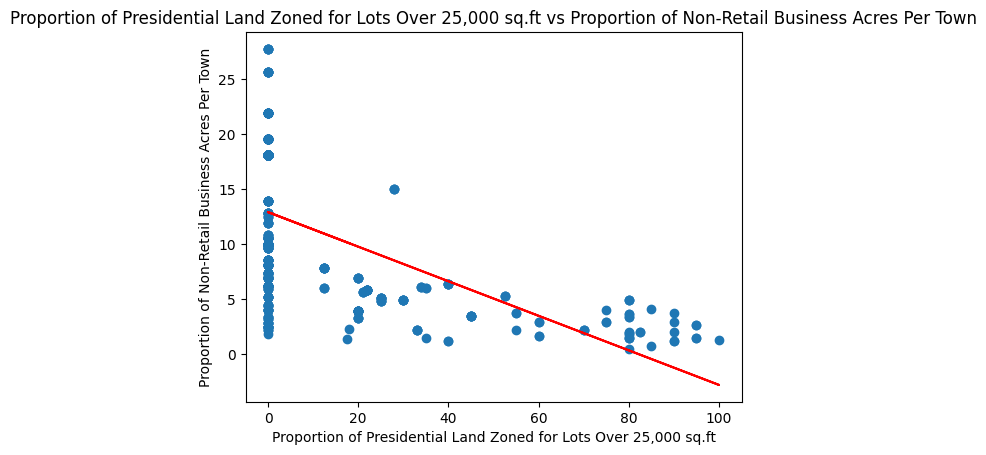

In [5]:
plt.scatter(x = real_estate_data['ZN'], y = real_estate_data['INDUS'])
plt.title("Proportion of Presidential Land Zoned for Lots Over 25,000 sq.ft vs Proportion of Non-Retail Business Acres Per Town")
plt.xlabel("Proportion of Presidential Land Zoned for Lots Over 25,000 sq.ft")
plt.ylabel("Proportion of Non-Retail Business Acres Per Town")

# m is the slope and b is intercept of linear regression line
x = real_estate_data['ZN']
y = real_estate_data['INDUS']
m, b = np.polyfit(x, y, 1)

# x is still x, but y = mx + b
plt.plot(x, m * x + b, 'r')

plt.show()

It does seem like the best way to characterize this relationship would indeed be a linear relationship.

Let's test a simple, negative, linear reltionship.

Hypohtesis Testing

Ho: ZN & INDUS have NO relationship.

Ha: ZN & INDUS have a negative, linear relationship.

Ho: m = 0

Ha: m < 0

In [6]:
# Only using 'ZN' column, so we need to reshape to fit scikit's fit() function
regr_X = np.array(real_estate_data['ZN']).reshape(-1, 1)
# Response is 'INDUS'
regr_y = real_estate_data['INDUS']

# Building a linear regression model using scikit's sklearn
regr = linear_model.LinearRegression()

# Calculating the parameters of our regression model using the fit() method
lin_model = regr.fit(X = regr_X, y = regr_y)

# Coefficient of proportion of presidential land zoned for lots over 25,000 sq.ft in our model
print("Coefficient of proportion of presidential land zoned for lots over 25,000 sq.ft: ", lin_model.coef_)

# Intercept Value in our model
print("Intercept in our model: ", lin_model.intercept_)

# Coefficient of Determination score
print("R^2 Score: ", regr.score(X = regr_X, y = regr_y))

Coefficient of proportion of presidential land zoned for lots over 25,000 sq.ft:  [-0.15696115]
Intercept in our model:  12.917292809638054
R^2 Score:  0.2852689046515726


INDUS = (-0.16)ZN + 12.92

In [7]:
# Need to add a column of 1s to create a constant term
# statsmodels.api does not do it for us like sklearn does
summary_X = sm.add_constant(regr_X)

# Make into dataframes to make sure variable names are shown in output
summary_X = pd.DataFrame(summary_X).reset_index(drop=True)
summary_X.columns = ['Constant', 'ZN']
summary_y = pd.DataFrame(regr_y).reset_index(drop=True)

summary_est = sm.OLS(summary_y, summary_X)

print(summary_est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  INDUS   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     203.2
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           4.99e-39
Time:                        11:48:51   Log-Likelihood:                -1620.4
No. Observations:                 511   AIC:                             3245.
Df Residuals:                     509   BIC:                             3253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      12.9173      0.284     45.472      0.0

t-critical = 1.960, our model's |t-value| = 14.253

Since our t-value was >t*, we have statistically-significant evidence to suggest at a 95% confidence level that Proportion of Residential Land Zoned for Lots over 25,000 sq.ft. and Proportion of Non-Retail Business Acres Per Town.